In [1]:
import pathlib
import zarr
import tqdm

In [2]:
zarr_path = pathlib.Path("../data/Araripesaurus.zarr")

In [3]:
vol = zarr.open(str(zarr_path), mode="r")

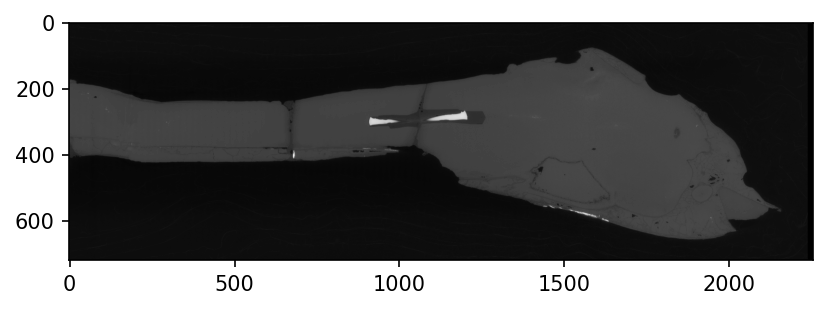

In [25]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.imshow(vol[300], cmap="gray")
plt.show()


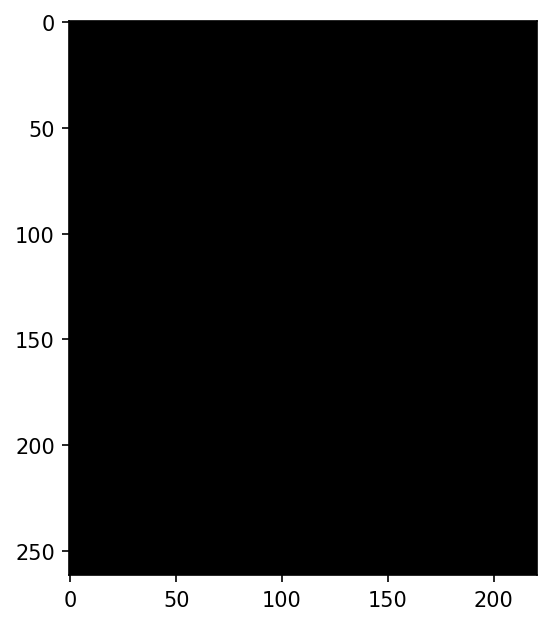

In [6]:

plt.figure(dpi=150)
plt.imshow(vol[500:2000,500:2000,500], cmap="gray", vmin=8000, vmax=15000)

In [10]:
# Get the hist of the volume
import numpy as np
# # plt.hist(np.ravel(vol[:]), bins=100)
# # plt.show()

# # Get the hist of the volume of 64 slices
# plt.hist(np.ravel(vol[500:2000,500:2000,500:564]), bins=100)
# plt.xlim(10_000, 20_000)
# plt.show()
    
vmin = 10_000
vmax = 20_000


In [ ]:
# Create a new zarr called AraripesaurusTrimmed.u8.mip2.zarr
# First: create a new zarr with the same shape as the trimmed volume
# 2: copy the data from the original zarr to the new zarr
# 3: Get the hist 

In [19]:
u8_zarr_path = pathlib.Path("../data/Araripesaurus.u8.mip2.zarr")
u8_vol = zarr.open(
    str(u8_zarr_path),
    mode="w",
    shape=(vol.shape[0] // 4, vol.shape[1] // 4, vol.shape[2] // 4),
    chunks=(256, 256, 256),
    dtype="u8",
    write_empty_chunks=False,
    compressor=zarr.Blosc(),
)

# Loop through chunks of size CHUNK and copy the data[::4,::4,::4] to the new zarr as u8, remapping vmin and vmax to 0 and 255

CHUNK = 256
for z in tqdm.tqdm(range(0, vol.shape[2], CHUNK)):
    zmin = z
    zmax = min(z + CHUNK, vol.shape[2])

    excerpt = vol[::4, ::4, zmin:zmax]
    excerpt = excerpt[:, :-1, ::4]
    excerpt = np.clip(excerpt, vmin, vmax)
    excerpt = (excerpt - vmin) / (vmax - vmin) * 255
    excerpt = excerpt.astype("u8")
    print(excerpt.min(), excerpt.max())
    u8_vol[:, :, (zmin // 4) : (zmin // 4) + excerpt.shape[2]] = excerpt


  0%|          | 0/36 [00:00<?, ?it/s]

0 255


  3%|▎         | 1/36 [00:01<01:03,  1.82s/it]

0 255


  6%|▌         | 2/36 [00:03<01:06,  1.96s/it]

0 255


  8%|▊         | 3/36 [00:05<01:03,  1.91s/it]

0 0


 11%|█         | 4/36 [00:06<00:51,  1.62s/it]

0 0


 14%|█▍        | 5/36 [00:07<00:42,  1.38s/it]

0 0


 17%|█▋        | 6/36 [00:08<00:37,  1.24s/it]

0 0


 19%|█▉        | 7/36 [00:09<00:33,  1.15s/it]

0 0


 19%|█▉        | 7/36 [00:10<00:44,  1.53s/it]


KeyboardInterrupt: 

In [ ]:
# Donwshift the volume to u8, remapping vmin and vmax to 0 and 255
# and downres by a factor of 2 (mip1)
# u8_vol = (vol[::2, ::2, ::2] - vmin) / (vmax - vmin) * 255

